In [1]:
## Data Preprocessing
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    GridSearchCV

## Accuracy calculation
from sklearn import metrics
from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score

## Generate Dataset
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

## Find out execution time
from datetime import datetime

## Graph visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
X,Y = make_classification(n_samples = 10000, n_features = 12, 
                     n_informative = 10, n_classes = 5, random_state = 0 )
print(X.shape)
print(Y.shape)

(10000, 12)
(10000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# Decision Tree

In [4]:
dt = DecisionTreeClassifier(random_state=42)

startTime = datetime.now()

param_grid = {
#     'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : [4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
#     'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
}

CV_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
CV_dt.fit(X_train, y_train)

print(CV_dt.best_params_)

print(datetime.now() - startTime)

{'criterion': 'gini', 'max_depth': 8}
0:00:03.541578


In [5]:
dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 8,
#     max_features = 11,
#     min_samples_leaf = 0.1,
#     min_samples_split = 0.1
)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred = dt.predict(X_test)
pred_prob = dt.predict_proba(X_test)

print(classification_report(y_test, pred))

dt_score = dt.score(X_test,y_test)
print('Score of decision tree classifier: ', dt_score)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       600
           1       0.55      0.67      0.61       612
           2       0.69      0.66      0.68       571
           3       0.69      0.64      0.67       602
           4       0.60      0.52      0.56       615

   micro avg       0.63      0.63      0.63      3000
   macro avg       0.64      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000

Score of decision tree classifier:  0.631


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.791799 to fit



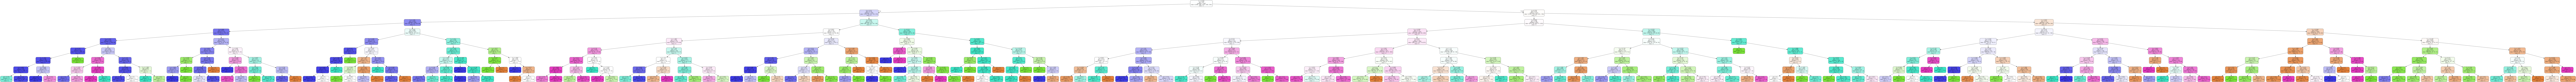

In [6]:
dot_data = StringIO()

export_graphviz(dt, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
#                 feature_names = X_train.columns.values, 
                class_names=['0','1', '2', '3', '4'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# graph.write_png('UserActivity_2.png')

Image(graph.create_png())

# Gradient Boosting

In [7]:
# np.linspace(2, 10, 9, endpoint=True)

In [8]:
gb = ensemble.GradientBoostingClassifier(random_state=42)

startTime = datetime.now()

param_grid = {
#     'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : np.linspace(2, 10, 9, endpoint=True),
#     'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
}

CV_gb = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 5)
CV_gb.fit(X_train, y_train)

print(CV_gb.best_params_)

print(datetime.now() - startTime)

{'max_depth': 9.0}
0:07:03.128208


In [9]:
gb = ensemble.GradientBoostingClassifier(
    max_depth = 9
)

gb = gb.fit(X_train,y_train)

pred = gb.predict(X_test)
pred_prob = gb.predict_proba(X_test)

print(classification_report(y_test, pred))

gb_score = gb.score(X_test,y_test)
print('Score of gradient boosting classifier: ', gb_score)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       600
           1       0.79      0.84      0.81       612
           2       0.85      0.86      0.85       571
           3       0.89      0.83      0.86       602
           4       0.81      0.83      0.82       615

   micro avg       0.83      0.83      0.83      3000
   macro avg       0.84      0.83      0.84      3000
weighted avg       0.84      0.83      0.83      3000

Score of gradient boosting classifier:  0.8346666666666667


# Random Forest

In [10]:
# np.linspace(10, 100, 3, endpoint=True)

In [11]:
rf = ensemble.RandomForestClassifier(random_state=42)

startTime = datetime.now()

param_grid = {
#     'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : np.linspace(2, 10, 9, endpoint=True),
#     'n_estimators': np.linspace(10, 100, 3, endpoint=True)
}

CV_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
CV_rf.fit(X_train, y_train)

print(CV_rf.best_params_)

print(datetime.now() - startTime)

{'max_depth': 10.0}
0:00:03.691127


In [12]:
rf = ensemble.RandomForestClassifier(
    max_depth = 10
)

rf = rf.fit(X_train,y_train)

pred = rf.predict(X_test)
pred_prob = rf.predict_proba(X_test)

print(classification_report(y_test, pred))

rf_score = rf.score(X_test,y_test)
print('Score of random forest classifier: ', rf_score)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       600
           1       0.70      0.76      0.73       612
           2       0.78      0.78      0.78       571
           3       0.80      0.74      0.77       602
           4       0.70      0.72      0.71       615

   micro avg       0.74      0.74      0.74      3000
   macro avg       0.75      0.74      0.75      3000
weighted avg       0.75      0.74      0.74      3000

Score of random forest classifier:  0.7443333333333333


# AdaBoost 

In [13]:
score = np.array([])

startTime = datetime.now()

for j in np.arange(3) + 4: # [4, 5, 6]
    Ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth = j), n_estimators = 100)
    mod_cv = cross_val_score(Ada, X_train,y_train, cv = 10)
    score = np.append(score, np.mean(mod_cv))
    print("j->", j, "Mean->", np.mean(mod_cv))
param = np.argmax(score) + 4
print('best parameter: ', param)
print(datetime.now() - startTime)

j-> 4 Mean-> 0.6914475978244716
j-> 5 Mean-> 0.7285989622280054
j-> 6 Mean-> 0.7567415268772718
best parameter:  6
0:02:02.637156


In [14]:
Ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth = param), n_estimators = 100)

Ada = Ada.fit(X_train,y_train)

pred = Ada.predict(X_test)
pred_prob = Ada.predict_proba(X_test)

print(classification_report(y_test, pred))

Ada_score = Ada.score(X_test,y_test)
print('Score of AdaBoost classifier: ', Ada_score)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       600
           1       0.72      0.75      0.74       612
           2       0.82      0.80      0.81       571
           3       0.81      0.76      0.78       602
           4       0.69      0.76      0.73       615

   micro avg       0.76      0.76      0.76      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000

Score of AdaBoost classifier:  0.762


# Best Model Selection

In [15]:
print('Score of decision tree classifier: ', dt_score)
print('Score of gradient boosting classifier: ', gb_score)
print('Score of random forest classifier: ', rf_score)
print('Score of AdaBoost classifier: ', Ada_score)

Score of decision tree classifier:  0.631
Score of gradient boosting classifier:  0.8346666666666667
Score of random forest classifier:  0.7443333333333333
Score of AdaBoost classifier:  0.762
